In [1]:
] activate ../../Acceleration

 Activating environment at `~/Desktop/Code/Acceleration/Acceleration/Project.toml`


In [2]:
using Acceleration

data, labels = load_dataset("CIFAR-10",[0,1],100,20);
f,∇f,∇ϕ_cjg,σ,L,μ  = linear_regression(data,labels);

┌ Info: Loading dataset CIFAR-10 with 50000 samples and 3072 features
└ @ Acceleration /Users/victor/Desktop/Code/Acceleration/Acceleration/src/datasets.jl:26


In [3]:
n = size(data,2)
x_ini = zeros(n)
k = 1000;

@time x_out1 = mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out2 = gradient_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out3 = accelerated_mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out4 = SCVX_AMD(f,∇f,∇ϕ_cjg,x_ini,σ,L,μ,k);

  0.242912 seconds (936.02 k allocations: 51.338 MiB)
  0.051020 seconds (34.83 k allocations: 6.488 MiB, 55.35% gc time)
  0.025039 seconds (51.21 k allocations: 7.913 MiB)
  0.106057 seconds (321.06 k allocations: 22.325 MiB)


In [4]:
using JuMP
using Ipopt

@time model = Model(with_optimizer(Ipopt.Optimizer))
@time set_silent(model)
@time @variable(model, x[1:n])
@time @objective(model, Min, f(x))
@time optimize!(model)
@time x_opt = value.(x);

┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1278


  0.536743 seconds (651.26 k allocations: 33.561 MiB)
  0.056034 seconds (168.98 k allocations: 8.341 MiB)
  0.676077 seconds (1.68 M allocations: 81.704 MiB, 3.98% gc time)
  0.765877 seconds (2.56 M allocations: 134.163 MiB, 2.70% gc time)

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

 17.893284 seconds (85.85 M allocations: 4.951 GiB, 6.05% gc time)
  0.179529 seconds (488.03 k allocations: 25.431 MiB)


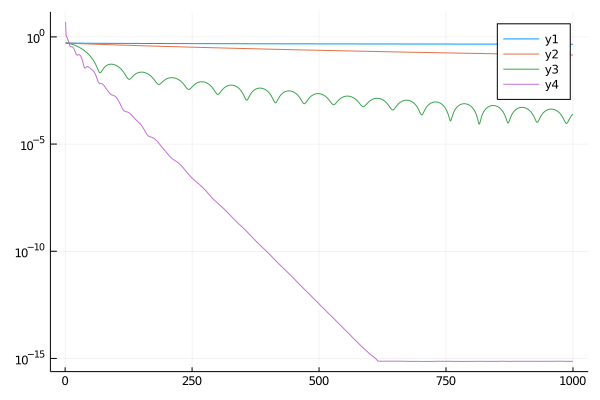

In [5]:
using Plots
using LinearAlgebra

p1 = sqrt.(sum((x_out1 .- x_opt).^2, dims=1)');
p2 = sqrt.(sum((x_out2 .- x_opt).^2, dims=1)');
p3 = sqrt.(sum((x_out3 .- x_opt).^2, dims=1)');
p4 = sqrt.(sum((x_out4 .- x_opt).^2, dims=1)');


plot(hcat(p1,p2,p3,p4),yaxis=:log)